# Лабораторная работа №3
Классификация пингвинов
Выполнили студенты Зимин Андрей Валерьевич, Жилин Андрей Игроевич

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as rec
from sklearn.metrics import precision_score as pre
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator
import seaborn as sns

## Задание 1
1. Загрузить данные из файла «pinguins.csv». Проверить, что загружены все 333 кортежа данных по всем 7 признакам  
2. Определить типы данных
3. Определить параметры числовых данных
4. Для нечисловых (текстовых) данных определить количество записей по каждому элементу и визуализировать гистограммы, например, так (для признака «species»)
5. Для каждого текстового признака построить мозаику 2D диаграмм рассеяния выбирая в качестве параметров всевозможные пары числовых признаков, аналогично мозаике диаграмм для ирисов.

In [2]:
df = pd.read_csv("./data/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


Загрузили датасет. Действительно 7 признаков и 333 строки

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


species            - категориальный признак  
island             - категориальный признак  
bill_length_mm     - числовой признак  
bill_depth_mm      - числовой признак  
flipper_length_mm  - числовой признак  
body_mass_g        - числовой признак  
sex                - бинарный признак   

Перед обучением нужно будет закодировать категориальные признаки one-hot encoding

In [4]:
pd.options.display.float_format = '{:,.3f}'.format
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000,333.000,333.000,333.000
mean,43.993,17.165,200.967,"4,207.057"
std,5.469,1.969,14.016,805.216
min,32.100,13.100,172.000,"2,700.000"
25%,39.500,15.600,190.000,"3,550.000"
50%,44.500,17.300,197.000,"4,050.000"
75%,48.600,18.700,213.000,"4,775.000"
max,59.600,21.500,231.000,"6,300.000"


Видим, что сильно выделяется признак массы тела, он на 2-3 порядка больше остальных признаков. Перед обучением было бы неплохо провести нормализацию

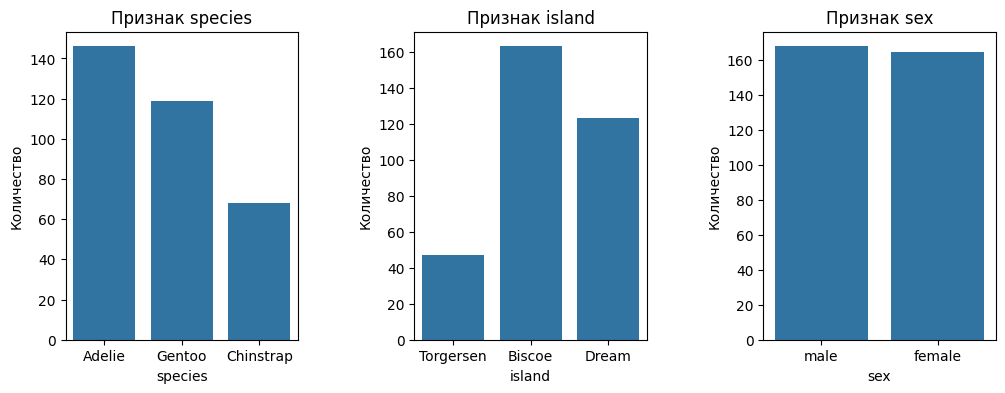

In [5]:
category_columns = ['species', 'island', 'sex']

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.subplots_adjust(wspace=0.5)

for i, category in enumerate(category_columns):
    sns.countplot(data=df, x=category, ax=ax[i])
    ax[i].set_title(f'Признак {category}')
    ax[i].set_ylabel('Количество')

Text(0.5, 1.02, 'Парные графики пингвинов по признаку пола')

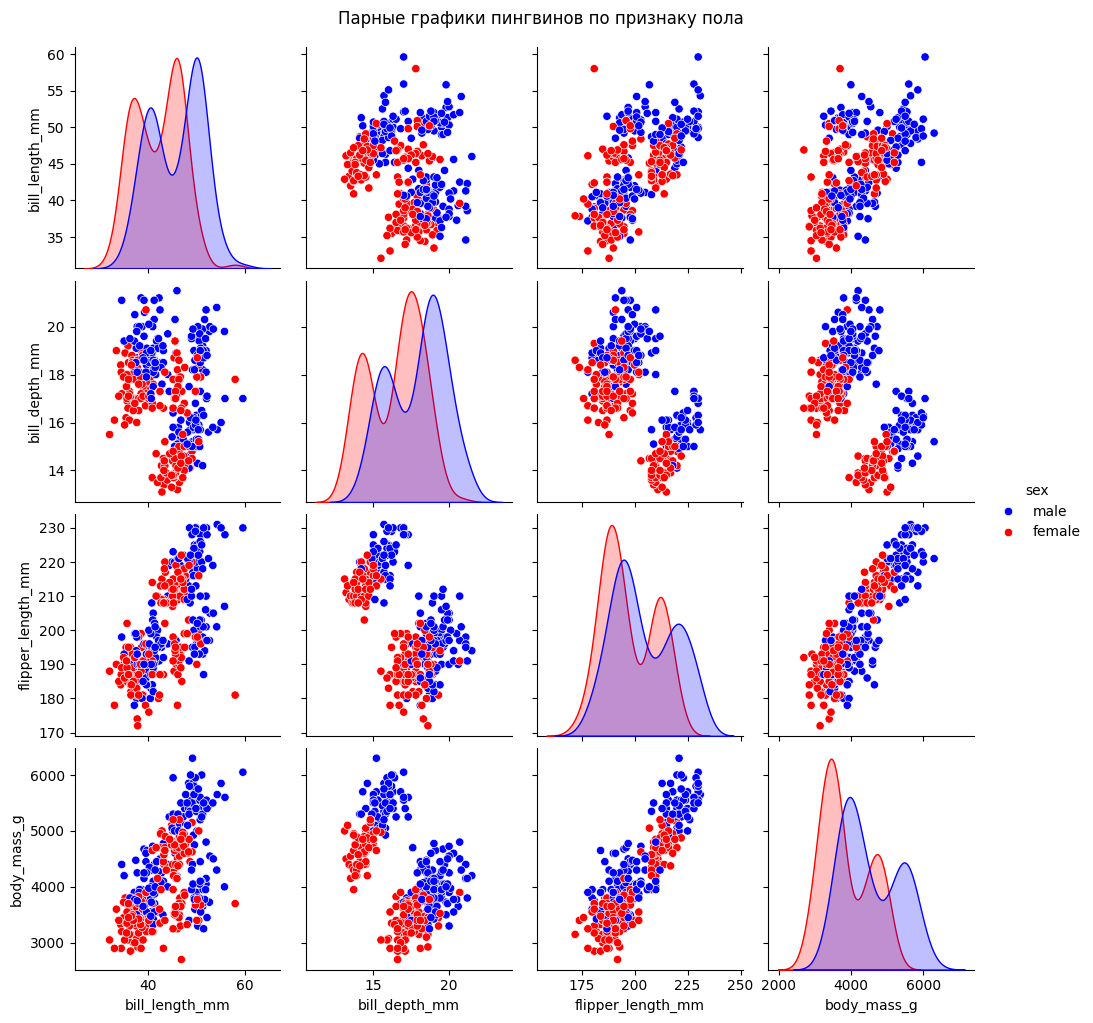

In [6]:
palette = {'male': 'blue', 'female': 'red'}
pairplot = sns.pairplot(df, hue='sex', palette=palette,)
pairplot.fig.suptitle('Парные графики пингвинов по признаку пола', y=1.02)

Пингвинов хорошо получиться классифицировать по признаку пола

Text(0.5, 1.02, 'Парные графики пингвинов по признаку вида')

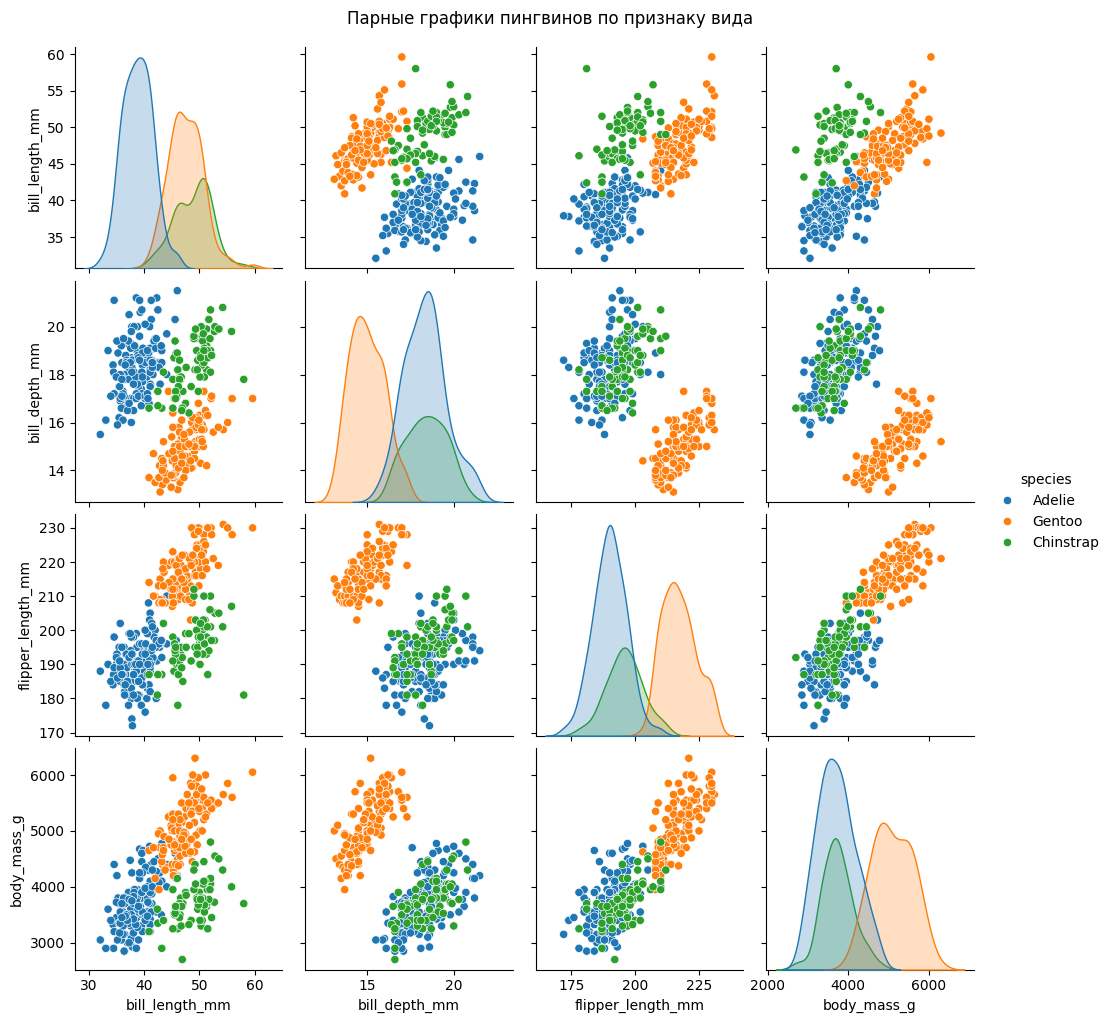

In [7]:
pairplot = sns.pairplot(df, hue='species')
pairplot.fig.suptitle('Парные графики пингвинов по признаку вида', y=1.02)

Судя по графикам удастся хорошо классифицировать пингвинов по классам.

Text(0.5, 1.02, 'Парные графики пингвинов по признаку острова')

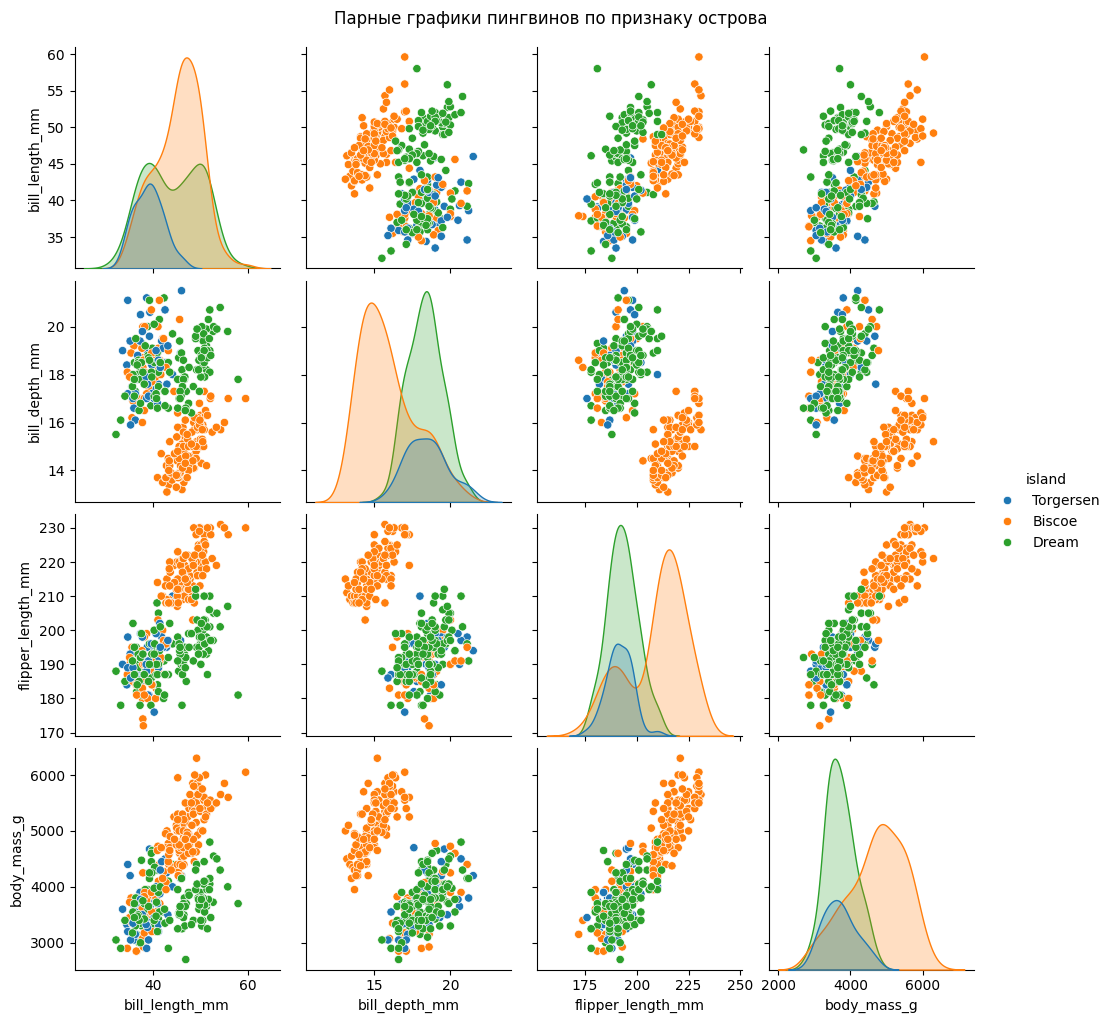

In [8]:
pairplot = sns.pairplot(df, hue='island')
pairplot.fig.suptitle('Парные графики пингвинов по признаку острова', y=1.02)

Видно, что пингвины с одними и теми же массо-габаритными характеристиками живут на разных островах. Классифицировать по этому признаку будет трудно.